In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style="ticks")
import gc
import itertools
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 100)
np.random.seed(42)
#import plotly
from datetime import datetime, timedelta
#import plotly.offline as pyoff
#import plotly.graph_objs as go
#initiate visualization library for jupyter notebook 
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#pyoff.init_notebook_mode(connected=True)
%matplotlib inline


In [2]:
# loading data 
customers = pd.read_csv("olist_customers_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
seller = pd.read_csv("olist_sellers_dataset.csv")
translate = pd.read_csv("product_category_name_translation.csv")




In [3]:
order_items.shape

(112650, 7)

In [4]:
#merging all files with order_id to one dataframe



df1 = order_items.merge(order_payments, on='order_id')
df2 = df1.merge(orders, on='order_id')
df_merged_order_id = df2.merge(customers, on='customer_id')

print(df_merged_order_id.shape)




(117601, 22)


In [5]:
df_merged_order_id.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [6]:
#merging all files with customer_id to one dataframe

df_merged_customer_id = customers.merge(orders, on='customer_id')
print(df_merged_customer_id.shape)

(99441, 12)


In [7]:
#merging all files with product_id to one dataframe

df_merged_product_id = order_items.merge(product, on='product_id')
print(df_merged_product_id.shape)

(112650, 15)


In [8]:
df_merged_order_id.isnull().sum()


df_merged_order_id.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [9]:
df_merged_customer_id.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
df_merged_product_id.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
dtype: int64

In [11]:
df_merged_order_id.dropna(inplace=True)
df_merged_order_id.isnull().values.any()

False

In [12]:
df_merged_order_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115018 entries, 0 to 117600
Data columns (total 22 columns):
order_id                         115018 non-null object
order_item_id                    115018 non-null int64
product_id                       115018 non-null object
seller_id                        115018 non-null object
shipping_limit_date              115018 non-null object
price                            115018 non-null float64
freight_value                    115018 non-null float64
payment_sequential               115018 non-null int64
payment_type                     115018 non-null object
payment_installments             115018 non-null int64
payment_value                    115018 non-null float64
customer_id                      115018 non-null object
order_status                     115018 non-null object
order_purchase_timestamp         115018 non-null object
order_approved_at                115018 non-null object
order_delivered_carrier_date     115018 non-null 

In [13]:
len(df_merged_order_id.columns)

22

In [14]:
my_df=df_merged_order_id



In [15]:
dates= ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in dates:
    my_df[col]= pd.to_datetime(my_df[col], format = '%Y-%m-%d %H:%M:%S')

In [16]:
dates


['shipping_limit_date',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [17]:
type(my_df['order_purchase_timestamp'])

pandas.core.series.Series

In [18]:
my_df['day'] = (my_df['order_purchase_timestamp']).dt.day
my_df['month'] = (my_df['order_purchase_timestamp']).dt.month
my_df['year'] = (my_df['order_purchase_timestamp']).dt.year

In [19]:
my_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,day,month,year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,13,9,2017
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,26,4,2017
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,14,1,2018
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,8,8,2018
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,4,2,2017


In [20]:
#Monthly sales

df_revenue = my_df.groupby(['month'])['payment_value'].sum().reset_index()
df_revenue

,month,payment_value
0,1,1550440.58
1,2,1603830.49
2,3,1941194.16
3,4,1922715.47
4,5,2181787.19
5,6,1870797.76
6,7,2022777.40
7,8,2053930.03
8,9,996085.61
9,10,1061201.27


In [21]:
my_df['month_year'] = my_df['month'].astype(str) + '-' + my_df['year'].astype(str)

In [22]:
df_revenue = my_df.groupby(['month_year'])['payment_value'].sum().reset_index()
df_revenue

,month_year,payment_value
0,1-2017,176376.56
1,1-2018,1374064.02
2,10-2016,62591.65
3,10-2017,998609.62
4,11-2017,1548547.86
5,12-2016,19.62
6,12-2017,1020067.26
7,2-2017,323815.95
8,2-2018,1280014.54
9,3-2017,505735.83


In [23]:
my_df['month_year']=pd.to_datetime(my_df.month_year)

In [24]:
#monthly revenue

df_revenue = my_df.groupby(['month_year'])['payment_value'].sum().reset_index()
df_revenue

,month_year,payment_value
0,2016-10-01,62591.65
1,2016-12-01,19.62
2,2017-01-01,176376.56
3,2017-02-01,323815.95
4,2017-03-01,505735.83
5,2017-04-01,456108.32
6,2017-05-01,701119.60
7,2017-06-01,585400.98
8,2017-07-01,716069.98
9,2017-08-01,842689.94


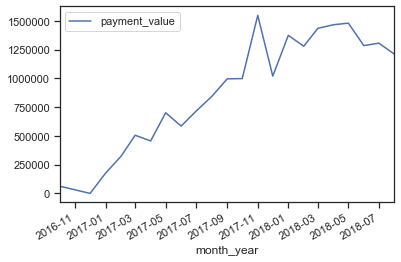

In [25]:
df_revenue.plot.line(x='month_year', y='payment_value')

In [51]:
#monthly Number of Orders

monthly_orders_df = my_df.groupby(['month_year'])['order_id'].count().reset_index()
print(monthly_orders_df)

   month_year  order_id
0  2016-10-01       336
1  2016-12-01         1
2  2017-01-01       961
3  2017-02-01      1949
4  2017-03-01      3078
5  2017-04-01      2707
6  2017-05-01      4260
7  2017-06-01      3687
8  2017-07-01      4726
9  2017-08-01      5053
10 2017-09-01      5002
11 2017-10-01      5455
12 2017-11-01      8812
13 2017-12-01      6440
14 2018-01-01      8364
15 2018-02-01      7766
16 2018-03-01      8337
17 2018-04-01      8112
18 2018-05-01      8104
19 2018-06-01      7318
20 2018-07-01      7196
21 2018-08-01      7354


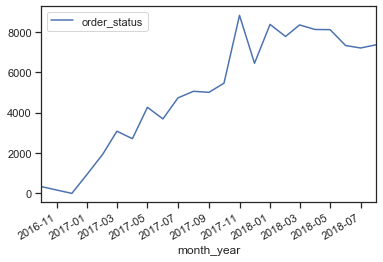

In [27]:
ax1=monthly_orders_df.plot.line(x='month_year', y='order_status')

Text(0, 0.5, 'No od orders')

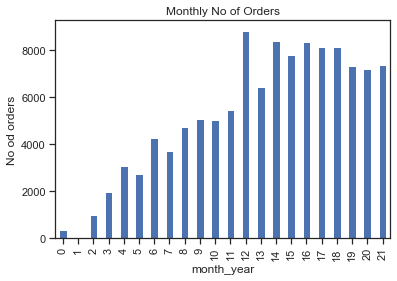

In [28]:
from matplotlib import pyplot as plt
monthly_orders_df['order_status'].plot(kind="bar", title="test")
plt.title("Monthly No of Orders")
plt.xlabel("month_year")
plt.ylabel("No od orders")

In [52]:
#Average revenue per order

avg_Revenue_per_order_df = my_df.groupby(['order_id'])['payment_value'].mean().reset_index()

print(avg_Revenue_per_order_df)

                               order_id  payment_value
0      00010242fe8c5a6d1ba2dd792cb16214          72.19
1      00018f77f2f0320c557190d7a144bdd3         259.83
2      000229ec398224ef6ca0657da4fc703e         216.87
3      00024acbcdf0a6daa1e931b038114c75          25.78
4      00042b26cf59d7ce69dfabb4e55b4fd9         218.04
5      00048cc3ae777c65dbb7d2a0634bc1ea          34.59
6      00054e8431b9d7675808bcb819fb4a32          31.75
7      000576fe39319847cbb9d288c5617fa6         880.75
8      0005a1a1728c9d785b8e2b08b904576c         157.60
9      0005f50442cb953dcd1d21e1fb923495          65.39
10     00061f2a7bc09da83e415a52dc8a4af1          68.87
11     00063b381e2406b52ad429470734ebd5          57.98
12     0006ec9db01a64e59a68b2c340bf65a7          97.32
13     0008288aa423d2a3f00fcb17cd7d8719         126.54
14     0009792311464db532ff765bf7b182ae         127.55
15     0009c9a17f916a706d71784483a5d643         650.34
16     000aed2e25dbad2f9ddb70584c5a2ded         152.77
17     000

Text(0, 0.5, 'Payment')

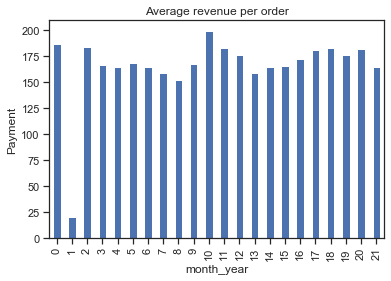

In [30]:
from matplotlib import pyplot as plt
avg_Revenue_per_order_df['payment_value'].plot(kind="bar", title="test")
plt.title("Average revenue per order")
plt.xlabel("month_year")
plt.ylabel("Payment")

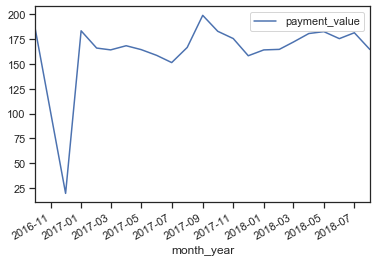

In [31]:
avg_Revenue_per_order_df.plot.line(x='month_year', y='payment_value')

In [32]:
#MONYTH:Y ACTIVE CUSTOMERS

monthly_actcustomer_df = my_df.groupby(['month_year'])['customer_unique_id'].nunique().reset_index()
monthly_actcustomer_df

,month_year,customer_unique_id
0,2016-10-01,267
1,2016-12-01,1
2,2017-01-01,716
3,2017-02-01,1618
4,2017-03-01,2508
5,2017-04-01,2274
6,2017-05-01,3478
7,2017-06-01,3076
8,2017-07-01,3802
9,2017-08-01,4114


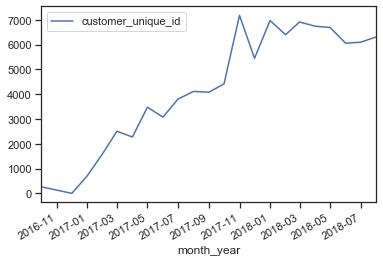

In [33]:
monthly_actcustomer_df.plot.line(x='month_year', y='customer_unique_id')

In [34]:
#Revenue

my_df['InvoiceYearMonth'] = my_df['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

In [35]:
my_df['Revenue'] = my_df['payment_value'] * my_df['order_item_id']
df_revenue = my_df.groupby(['InvoiceYearMonth'])['payment_value'].sum().reset_index()
df_revenue

,InvoiceYearMonth,payment_value
0,201610,62591.65
1,201612,19.62
2,201701,176376.56
3,201702,323815.95
4,201703,505735.83
5,201704,456108.32
6,201705,701119.60
7,201706,585400.98
8,201707,716069.98
9,201708,842689.94


In [36]:
#MONTHLY GROWTH RATE

df_revenue['MonthlyGrowth'] = df_revenue['payment_value'].pct_change()

#showing first 20 rows
df_revenue.head(20)

,InvoiceYearMonth,payment_value,MonthlyGrowth
0,201610,62591.65,NaN
1,201612,19.62,-0.999687
2,201701,176376.56,8988.630989
3,201702,323815.95,0.835935
4,201703,505735.83,0.561800
5,201704,456108.32,-0.098129
6,201705,701119.60,0.537178
7,201706,585400.98,-0.165048
8,201707,716069.98,0.223213
9,201708,842689.94,0.176826


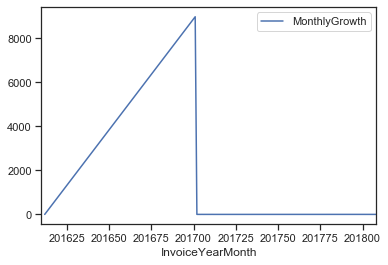

In [37]:
df_revenue.plot.line(x='InvoiceYearMonth', y='MonthlyGrowth')

In [38]:
#New Customer Ratio
my_df.columns
#

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state', 'day',
       'month', 'year', 'month_year', 'InvoiceYearMonth', 'Revenue'],
      dtype='object')

In [39]:
fist_purchase= my_df.groupby('customer_unique_id').month_year.min().reset_index()
fist_purchase.columns = ['customer_unique_id','FirstPurchaseDate']

In [40]:
fist_purchase

,customer_unique_id,FirstPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01
2,0000f46a3911fa3c0805444483337064,2017-03-01
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04-01
6,00050ab1314c0e55a6ca13cf7181fecf,2018-04-01
7,00053a61a98854899e70ed204dd4bafe,2018-02-01
8,0005e1862207bf6ccc02e4228effd9a0,2017-03-01
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2018-03-01


In [41]:
fist_purchase['FirstPurchaseYearMonth'] = fist_purchase['FirstPurchaseDate'].map(lambda date: 100*date.year + date.month)

In [42]:
my_df=pd.merge(my_df, fist_purchase, on='customer_unique_id')
my_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,day,month,year,month_year,InvoiceYearMonth,Revenue,FirstPurchaseDate,FirstPurchaseYearMonth
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,13,9,2017,2017-09-01,201709,72.19,2017-09-01,201709
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,26,4,2017,2017-04-01,201704,259.83,2017-04-01,201704
2,c105be01f21c9df6a2579f59b95cbcd9,1,d2f5484cbffe4ca766301b21ab9246dd,36a968b544695394e4e9d7572688598f,2017-09-22 16:27:55,12.88,11.85,1,credit_card,1,24.73,02288a47f696f3054b9ef1d5f8e73973,delivered,2017-09-18 16:12:04,2017-09-18 16:27:55,2017-09-20 20:00:24,2017-09-25 21:59:46,2017-10-04,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,18,9,2017,2017-09-01,201709,24.73,2017-04-01,201704
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,14,1,2018,2018-01-01,201801,216.87,2018-01-01,201801
4,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,8,8,2018,2018-08-01,201808,25.78,2018-08-01,201808


In [43]:
my_df['UserType'] = 'New'
my_df.loc[my_df['InvoiceYearMonth']>my_df['FirstPurchaseYearMonth'],'UserType'] = 'Existing'

In [44]:
my_df.UserType.value_counts()

New         112510
Existing      2508
Name: UserType, dtype: int64

In [45]:
#New vs Existing Customer revenue


NewVsEx_revenue = my_df.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()



In [46]:
NewVsEx_revenue

,InvoiceYearMonth,UserType,Revenue
0,201610,New,93322.83
1,201612,New,19.62
2,201701,Existing,19.62
3,201701,New,324237.17
4,201702,Existing,111.07
5,201702,New,407192.34
6,201703,Existing,596.38
7,201703,New,652255.14
8,201704,Existing,3182.86
9,201704,New,542944.15


In [47]:
ratio = my_df.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['customer_unique_id'].nunique()/my_df.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['customer_unique_id'].nunique() 
ratio = ratio.reset_index()
ratio = ratio.dropna()

In [48]:
my_df.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['customer_unique_id'].nunique()

InvoiceYearMonth
201610     267
201612       1
201701     715
201702    1616
201703    2503
201704    2256
201705    3450
201706    3037
201707    3752
201708    4057
201709    4003
201710    4329
201711    7059
201712    5338
201801    6842
201802    6289
201803    6774
201804    6582
201805    6506
201806    5875
201807    5946
201808    6144
Name: customer_unique_id, dtype: int64

In [49]:
my_df.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['customer_unique_id'].nunique()

InvoiceYearMonth
201701      1
201702      2
201703      5
201704     18
201705     28
201706     39
201707     50
201708     57
201709     79
201710     88
201711    123
201712    112
201801    132
201802    112
201803    140
201804    162
201805    187
201806    183
201807    151
201808    166
Name: customer_unique_id, dtype: int64

In [50]:
#Expected Revenue Prediction



